In [267]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import  KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve , accuracy_score

In [3]:
# Read-in Personal Listening History
df = pd.read_json("StreamingHistory0.json")
df.head()

,endTime,artistName,trackName,msPlayed
0,2019-02-13 06:25,Ludwig van Beethoven,"Piano Sonata No. 17 In D Minor, Op. 31, No. 2 ...",5827
1,2019-02-13 06:26,Ludwig van Beethoven,"Piano Sonata No. 17 In D Minor, Op. 31, No. 2 ...",2069
2,2019-02-13 06:26,Danney Alkana,"Beethoven: ""Symphony No. Five"" Complete",6574
3,2019-02-13 06:26,Ludwig van Beethoven,"Piano Sonata No. 14 in C-Sharp Minor, Op. 27 N...",12975
4,2019-02-13 06:30,Ludwig van Beethoven,"Beethoven: Symphony No. 7 in A Major, Op. 92: ...",237475


In [4]:
df = df.rename(columns={"artistName":"artist","endTime":"date","trackName":"track"})

Text(0.5, 1.0, 'Phân phối số lần nghe của các bài hát')

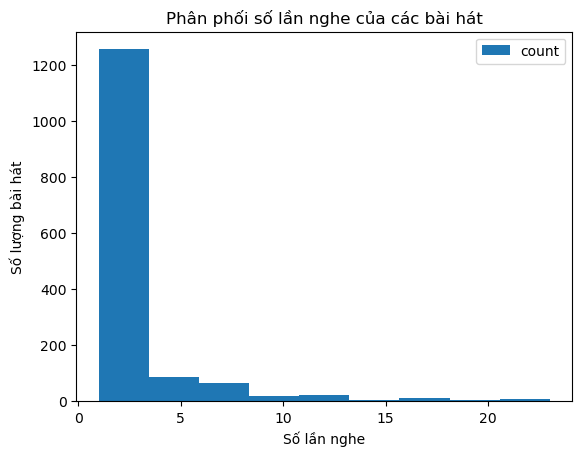

In [5]:
ax = df.groupby(['artist','track']).size().to_frame('count').reset_index().plot(kind='hist',bins=9)
ax.set_xlabel("Số lần nghe")
ax.set_ylabel("Số lượng bài hát")
ax.set_title("Phân phối số lần nghe của các bài hát")

In [6]:
df = df.groupby(['artist','track']).size().to_frame('count').reset_index()
df = df[df['count']>=3]
df.head(5)

,artist,track,count
3,21 Savage,a lot,20
5,2Pac,All Eyez On Me,13
6,2Pac,Changes - Greatest Hits Version,4
8,2Pac,How Do U Want It - Edit,9
9,2Pac,I Get Around,11


In [191]:
features = pd.read_csv("song_track.csv")
features.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [192]:
features["favorite"] = np.where(
    features.artist_name.isin(df.artist) & features.track_name.isin(df.track), 1, 0
)

In [193]:
# For future use
future = features.copy(deep=True)

In [194]:
# Genre 
features.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [195]:
features

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,favorite
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,0
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,0
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962,0
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,0
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813,0
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489,0


In [196]:
features[features.genre == 'Comedy'].describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,favorite
count,9681.000000,9681.000000,9681.000000,9.681000e+03,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.0
mean,21.342630,0.793098,0.559038,2.353052e+05,0.676094,0.000574,0.724775,-11.689321,0.853532,98.235488,0.412764,0.0
std,8.428764,0.130313,0.089625,2.502539e+05,0.211705,0.009987,0.223437,4.777983,0.205918,27.839986,0.207258,0.0
min,0.000000,0.000363,0.239000,3.004000e+04,0.001410,0.000000,0.025800,-31.047000,0.023000,32.451000,0.023700,0.0
25%,15.000000,0.753000,0.499000,1.218800e+05,0.522000,0.000000,0.662000,-14.649000,0.888000,79.720000,0.252000,0.0
50%,20.000000,0.819000,0.561000,1.890570e+05,0.704000,0.000000,0.767000,-11.209000,0.928000,90.124000,0.410000,0.0
75%,26.000000,0.872000,0.620000,2.812930e+05,0.859000,0.000000,0.898000,-8.088000,0.944000,115.128000,0.561000,0.0
max,61.000000,0.995000,0.898000,5.552917e+06,0.998000,0.352000,0.996000,-0.255000,0.967000,207.157000,0.980000,0.0


In [203]:
features = features[features.genre!='Comedy']

In [205]:
features.head(1)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,favorite
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.91,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814,0


In [207]:
features.favorite.value_counts()

favorite
0    222472
1       572
Name: count, dtype: int64

In [211]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
features.loc[:, 'genre_encoded'] = label_encoder.fit_transform(features['genre'])
features.loc[:, 'artist_name_encoded'] = label_encoder.fit_transform(features['artist_name'])
features.loc[:, 'track_id_encoded'] = label_encoder.fit_transform(features['track_id'])
features.loc[:, 'key_encoded'] = label_encoder.fit_transform(features['key'])
features.loc[:, 'mode_encoded'] = label_encoder.fit_transform(features['mode'])
features.loc[:, 'time_signature_encoded'] = label_encoder.fit_transform(features['time_signature'])
features.loc[:, 'track_name_encoded'] = label_encoder.fit_transform(features['track_name'])
# correlation_matrix_1 = temp_df[["genre_encoded", "artist_name_encoded", "track_id_encoded", "key_encoded", 
#                                 "mode_encoded", "time_signature_encoded", "track_name_encoded", "favorite"]].corr()


In [217]:
X = features.drop(columns=['favorite','genre','artist_name','key','mode','time_signature', 'track_name', 'track_id'])
y = features.favorite
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X['favorite'] = y
X.head()
X.favorite.value_counts()

favorite
0    222472
1    222472
Name: count, dtype: int64

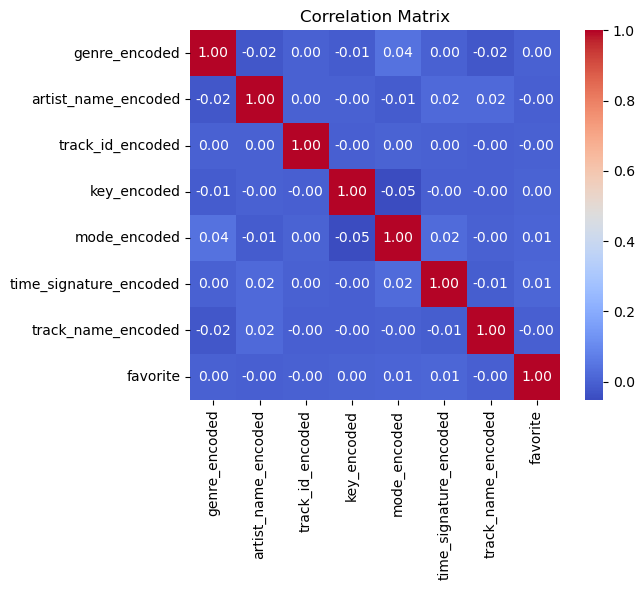

In [219]:
correlation_matrix_1 = features[["genre_encoded", "artist_name_encoded", "track_id_encoded", "key_encoded", 
                                "mode_encoded", "time_signature_encoded", "track_name_encoded", "favorite"]].corr()

sns.heatmap(correlation_matrix_1, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

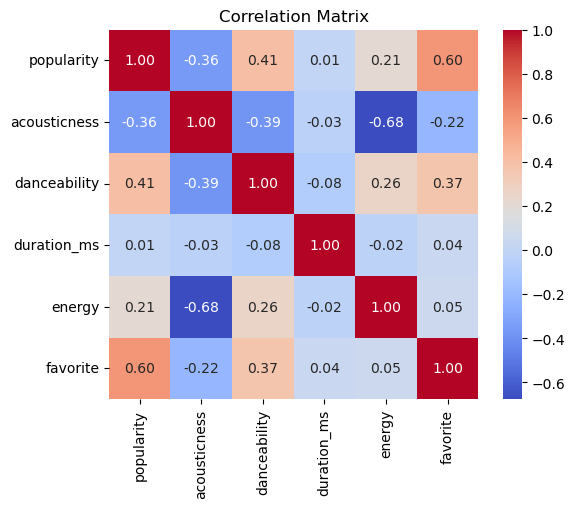

In [227]:
correlation_matrix_2 = X[["popularity", "acousticness", "danceability", 
                                 "duration_ms", "energy", 'favorite']].corr()
sns.heatmap(correlation_matrix_2, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

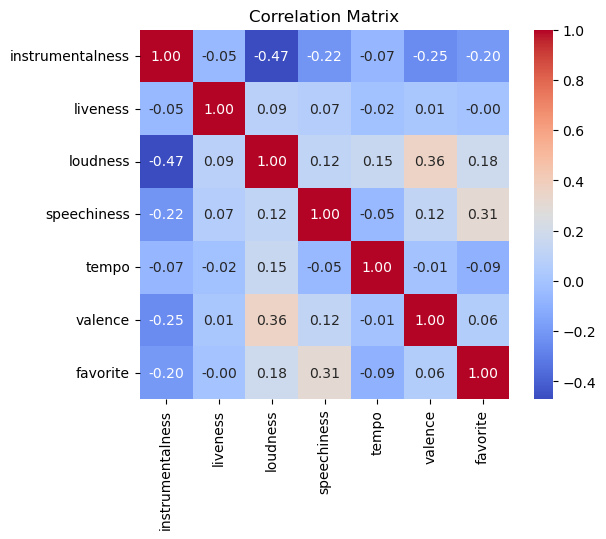

In [225]:
correlation_matrix_3 = X[['instrumentalness', 'liveness', 'loudness'
                                 , 'speechiness', 'tempo', 'valence', 'favorite']].corr()
sns.heatmap(correlation_matrix_3, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [229]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import f1_score
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

In [231]:
x = X[['popularity', 'danceability', 'speechiness']]

In [271]:
# Train / Split Data
X_train, X_test, y_train, y_test = train_test_split(x, X.favorite,test_size = 0.20,random_state=42)

In [273]:
def tune_hyperparameters(clf ,param_grid, X_train, y_train):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    clf_grid.fit(X_train, y_train)
    print("Best hyperparameters:\n", clf_grid.best_params_)
    return clf_grid.best_estimator_

In [286]:
# Create a Logistic Regression
lr_model = LogisticRegression(random_state =  0 )

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

# Find the best classifier with the optimal hyperparameters for rf model
tune_hyperparameters(lr_model, param_grid, X_train, y_train)

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5200 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.du

Best hyperparameters:
 {'C': 0.03359818286283781, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


LogisticRegression(C=0.03359818286283781, random_state=0, solver='liblinear')

In [303]:
# Create a Decision Tree classifier
LGR_model = LogisticRegression(C= 0.03359818286283781 ,max_iter = 100 , penalty = 'l2',
                               solver='liblinear', random_state = 0)

# Train the model
LGR_model.fit(X_train, y_train)

# Make predictions
y_pred_lgr = LGR_model.predict(X_test)

# Calculate accuracy
accuracy_lgr = accuracy_score(y_test, y_pred_lgr)
print(f'Accuracy: {accuracy_lgr:.2f}')

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lgr))


Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     44414
           1       0.77      0.81      0.79     44575

    accuracy                           0.78     88989
   macro avg       0.79      0.78      0.78     88989
weighted avg       0.79      0.78      0.78     88989



Text(0.5, 1.0, 'Confusion Matrix for logistic regression model  ')

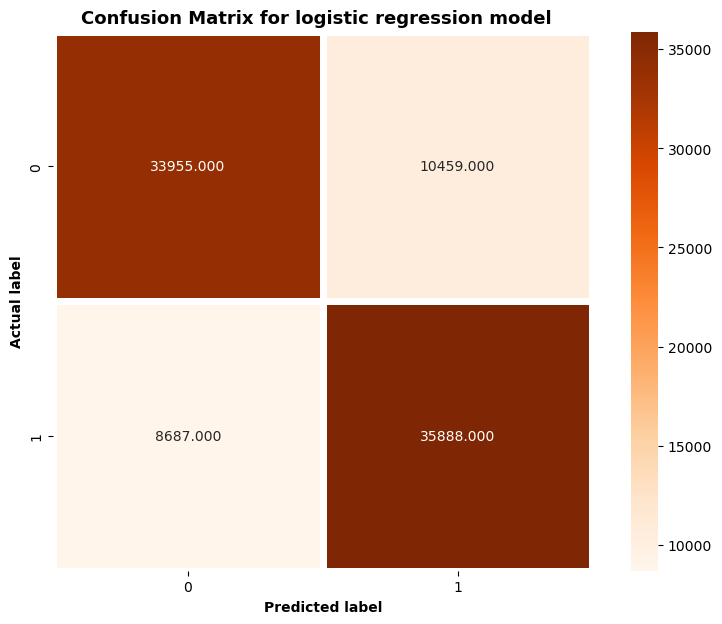

In [325]:
confuse_matrix_lg = confusion_matrix(y_test, y_pred_lgr)

plt.figure(figsize=(10, 7))
sns.heatmap(confuse_matrix_lg, annot=True, fmt=".3f", linewidths=5, square=True, cmap= 'Oranges')
plt.ylabel('Actual label', fontweight= 'bold')
plt.xlabel('Predicted label', fontweight= 'bold')
plt.title("Confusion Matrix for logistic regression model  ", size = 13 , fontweight = "bold" )

In [275]:
# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state= 0 )

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Find the best classifier with the optimal hyperparameters for dts model
tune_hyperparameters(dt_model, param_grid, X_train, y_train)


Best hyperparameters:
 {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


DecisionTreeClassifier(max_depth=30, random_state=0, splitter='random')

In [296]:
# Create a Decision Tree classifier
DTS_model = DecisionTreeClassifier(criterion="gini" ,max_depth = 30 , min_samples_leaf = 1 ,
                                   min_samples_split =  2 , splitter = "random" ,  random_state = 0)

# Train the model
DTS_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = DTS_model.predict(X_test)

# Calculate accuracy
accuracy_dts = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dts:.2f}')

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     44414
           1       0.97      0.98      0.97     44575

    accuracy                           0.97     88989
   macro avg       0.97      0.97      0.97     88989
weighted avg       0.97      0.97      0.97     88989



Text(0.5, 1.0, 'Confusion Matrix for decision tree classifier model  ')

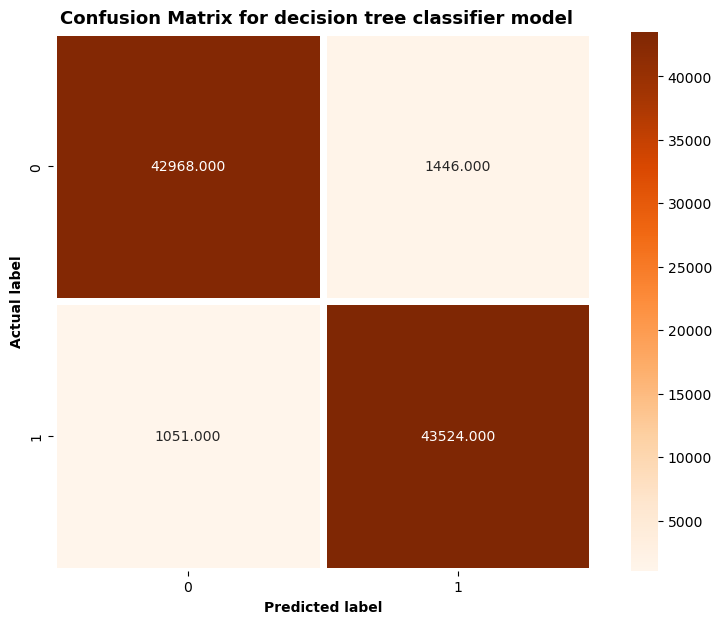

In [329]:
confuse_matrix_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(10, 7))
sns.heatmap(confuse_matrix_dt, annot=True, fmt=".3f", linewidths=5, square=True, cmap= 'Oranges')
plt.ylabel('Actual label', fontweight= 'bold')
plt.xlabel('Predicted label', fontweight= 'bold')
plt.title("Confusion Matrix for decision tree classifier model  ", size = 13 , fontweight = "bold" )

In [278]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state =  0 )

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Find the best classifier with the optimal hyperparameters for rf model
tune_hyperparameters(rf_model, param_grid, X_train, y_train)

Best hyperparameters:
 {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(max_depth=30, n_estimators=200, random_state=0)

In [307]:
RF_model = RandomForestClassifier(max_depth=30, 
                                  min_samples_leaf=1, 
                                  min_samples_split=2, 
                                  n_estimators=200, 
                                  random_state=0)

RF_model.fit(X_train, y_train)

y_pred_rf = RF_model.predict(X_test)

accurary_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accurary_rf:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     44414
           1       0.98      0.99      0.98     44575

    accuracy                           0.98     88989
   macro avg       0.98      0.98      0.98     88989
weighted avg       0.98      0.98      0.98     88989



Text(0.5, 1.0, 'Confusion Matrix for random forest classifier model  ')

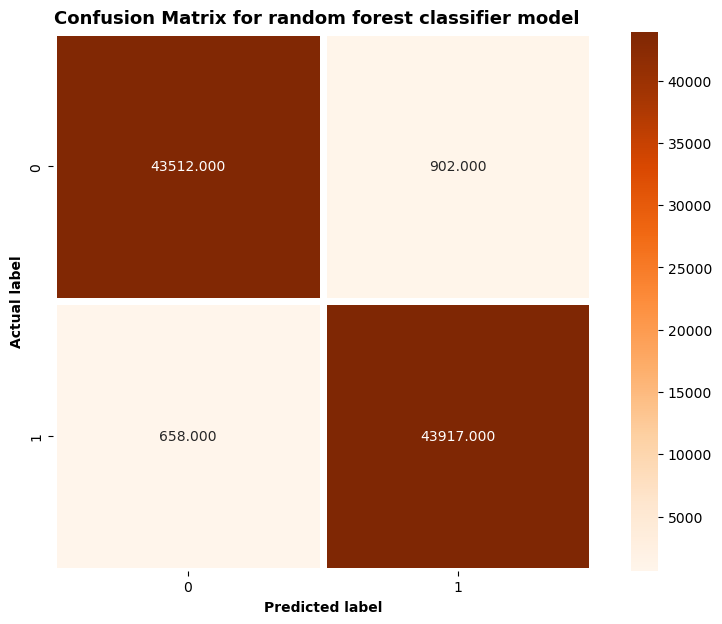

In [331]:
confuse_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(confuse_matrix_rf, annot=True, fmt=".3f", linewidths=5, square=True, cmap= 'Oranges')
plt.ylabel('Actual label', fontweight= 'bold')
plt.xlabel('Predicted label', fontweight= 'bold')
plt.title("Confusion Matrix for random forest classifier model  ", size = 13 , fontweight = "bold" )

### Predicting Songs and Saving Dataset for Personal Use

In [582]:
rf.fit(X_train, y_train)
prediction = rf.predict(future[['popularity', 'danceability', 'speechiness']])

In [583]:
future['prediction'] = prediction

In [584]:
future1 = future[(future['favorite'] == 0) & (future['prediction'] == 1)]

future2 = future[((future['favorite'] == 0) & (future['prediction'] == 0)) | 
                  ((future['favorite'] == 1) & (future['prediction'] == 1))]


In [590]:
future1

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,favorite,prediction
679,Alternative,Gorillaz,Feel Good Inc.,0d28khcov6AiegSCpG5TuT,77,0.00836,0.818,222640,0.705,0.002330,F#,0.6130,-6.679,Major,0.1770,138.559,4/4,0.7720,0,1
847,Country,Jelly Roll,My Smoking Song (feat. B Real),4A7xMwPSQRuNSY6p7yH3a4,43,0.40500,0.801,243500,0.582,0.000001,F#,0.1530,-6.843,Minor,0.2420,81.012,4/4,0.6400,0,1
1109,Alternative,Joji,NO FUN,4sbtM9ORGwmxGkXfctXbJq,71,0.80000,0.809,168418,0.483,0.000000,F,0.2210,-6.886,Major,0.0487,96.974,4/4,0.7150,0,1
1110,Alternative,6LACK,Pretty Little Fears (feat. J. Cole),4at3d5QWnlibMVN75ECDrp,74,0.71100,0.611,240342,0.466,0.000264,A,0.0847,-11.361,Major,0.3720,192.080,4/4,0.2230,0,1
1155,Alternative,GoldLink,Crew (feat. Brent Faiyaz & Shy Glizzy),15EPc80XuFrb2LmOzGjuRg,70,0.13300,0.728,176702,0.607,0.000000,C#,0.0864,-8.417,Minor,0.1320,129.938,4/4,0.4450,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231491,Soul,Duñe,Smile Together,43HggSmKEUHDXbaVWp55wH,47,0.71700,0.668,229974,0.389,0.000157,D,0.0774,-8.713,Minor,0.1310,90.013,4/4,0.0808,0,1
231706,Soul,Nellie Tiger Travis,If I Back It Up,4agux2ri6ezt9QwwEToj9I,35,0.14200,0.655,228987,0.459,0.000000,C#,0.1000,-6.168,Major,0.2770,203.364,4/4,0.8970,0,1
231891,Soul,Mayer Hawthorne,Someone Like You,1rfmeLSq9SHLInp1fEsgbg,41,0.09270,0.666,249767,0.652,0.000376,G,0.0474,-4.957,Minor,0.1130,171.918,4/4,0.7000,0,1
231952,Soul,Aretha Franklin,Get It Right,1zaigPe4NB94tc4CRshK46,43,0.04860,0.758,377093,0.829,0.000002,C#,0.0317,-6.622,Major,0.1740,122.298,4/4,0.8240,0,1


In [588]:
future2

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,favorite,prediction
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,0,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,0,0
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,0,0
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,0,0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962,0,0
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,0,0
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813,0,0
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489,0,0


In [ ]:
# Saving csv
future.to_csv("recommendations.csv")